In [1]:
%load_ext autoreload
%autoreload 2

import os
import json
from itertools import zip_longest
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mpl
from experiments.base.iqm import get_iqm_and_conf_per_epoch

experiment_folders = [
    "TUF_500_loss_1_2_fs_512_512_256_1024_512_256_act_relu_tanh/adadqnstatic",
	"TUF_500_loss_l1_fs_512_512_256_act_relu/dqn",
	"TUF_500_loss_l1_fs_512_512_256_act_tanh/dqn",
	"TUF_500_loss_l1_fs_1024_512_256_act_relu/dqn",
	"TUF_500_loss_l1_fs_1024_512_256_act_tanh/dqn",
	"TUF_500_loss_l2_fs_512_512_256_act_relu/dqn",
	"TUF_500_loss_l2_fs_512_512_256_act_tanh/dqn",
	"TUF_500_loss_l2_fs_1024_512_256_act_relu/dqn",
	"TUF_500_loss_l2_fs_1024_512_256_act_tanh/dqn",
]

base_path = os.path.join(os.path.abspath(''), "exp_output")


experiment_data = {experiment: {} for experiment in experiment_folders}

for experiment in experiment_folders:
	experiment_path = os.path.join(base_path, experiment, "episode_returns_and_lenghts")
		
	returns_experiment_ = []

	for experiment_file in os.listdir(experiment_path):
		list_episode_returns = json.load(open(os.path.join(experiment_path, experiment_file), "r"))["episode_returns"]

		returns_experiment_.append([np.mean(episode_returns) for episode_returns in list_episode_returns])

	returns_experiment = np.array(list(zip_longest(*returns_experiment_, fillvalue=np.nan))).T

	print(f"Plot {experiment} with {returns_experiment.shape[0]} seeds.")
	if np.isnan(returns_experiment).any():
		seeds = np.array(list(map(lambda path: int(path.strip(".json")), os.listdir(experiment_path))))
		print(f"!!! Seeds {seeds[np.isnan(returns_experiment).any(axis=1)]} are not complete !!!")

	experiment_data[experiment]["iqm"], experiment_data[experiment]["confidence"]  = get_iqm_and_conf_per_epoch(returns_experiment / 22 * 100)
	experiment_data[experiment]["x_values"] = np.arange(1, returns_experiment.shape[1] + 1) * 10_000

Plot TUF_500_loss_1_2_fs_512_512_256_1024_512_256_act_relu_tanh/adadqnstatic with 10 seeds.
Plot TUF_500_loss_l1_fs_512_512_256_act_relu/dqn with 10 seeds.
Plot TUF_500_loss_l1_fs_512_512_256_act_tanh/dqn with 10 seeds.
Plot TUF_500_loss_l1_fs_1024_512_256_act_relu/dqn with 10 seeds.
Plot TUF_500_loss_l1_fs_1024_512_256_act_tanh/dqn with 10 seeds.
Plot TUF_500_loss_l2_fs_512_512_256_act_relu/dqn with 10 seeds.
Plot TUF_500_loss_l2_fs_512_512_256_act_tanh/dqn with 10 seeds.
Plot TUF_500_loss_l2_fs_1024_512_256_act_relu/dqn with 10 seeds.
Plot TUF_500_loss_l2_fs_1024_512_256_act_tanh/dqn with 10 seeds.


In [2]:
# from experiments.craftax import COLORS, ORDERS

# plt.rc("font", family="serif", serif="Times New Roman", size=24)
# plt.rc("lines", linewidth=3)

# fig, axes = plt.subplots(1, 3, figsize=(18, 3.8), gridspec_kw={"width_ratios": [0.6, 0.4, 0.04]},)
# axes = axes.flatten()

# all_single_algorithms = np.array(experiment_folders[1:])

# all_values = np.array([experiment_data[experiment]["iqm"] for experiment in all_single_algorithms])
# all_confidence_low = np.array([experiment_data[experiment]["confidence"][0] for experiment in all_single_algorithms])
# all_confidence_high = np.array([experiment_data[experiment]["confidence"][1] for experiment in all_single_algorithms])

# # --------- Grid search ---------
# argmax_all_values = all_values.argmax(axis=0)
# grid_search_values = all_values[argmax_all_values, np.arange(100)]
# grid_search_interval_low =all_confidence_low[argmax_all_values, np.arange(100)]
# grid_search_interval_high = all_confidence_high[argmax_all_values, np.arange(100)]

# axes[0].plot(
# 	experiment_data[all_single_algorithms[0]]["x_values"] * len(all_single_algorithms),
# 	grid_search_values,
# 	color=COLORS["Grid search"],
# 	linestyle="solid",
# 	zorder=ORDERS["Grid search"]
# )
# axes[0].fill_between(
# 	experiment_data[all_single_algorithms[0]]["x_values"] * len(all_single_algorithms),
# 	grid_search_interval_low,
# 	grid_search_interval_high,
# 	color=COLORS["Grid search"],
# 	alpha=0.3,
# )

# # --------- Random search ---------
# random_search_values = all_values.mean(axis=0)
# random_search_interval_low =all_confidence_low.mean(axis=0)
# random_search_interval_high = all_confidence_high.mean(axis=0)

# axes[0].plot(
# 	experiment_data[all_single_algorithms[0]]["x_values"],
# 	random_search_values,
# 	color=COLORS["Random search"],
# 	linestyle="solid",
# 	zorder=ORDERS["Random search"]
# )
# axes[0].fill_between(
# 	experiment_data[all_single_algorithms[0]]["x_values"],
# 	random_search_interval_low,
# 	random_search_interval_high,
# 	color=COLORS["Random search"],
# 	alpha=0.3,
# )

# # --------- AdaDQN search ---------
# axes[0].plot(
# 	experiment_data[experiment_folders[0]]["x_values"],
# 	experiment_data[experiment_folders[0]]["iqm"],
# 	color=COLORS["AdaDQN"],
# 	linestyle="solid",
# 	zorder=ORDERS["AdaDQN"]
# )
# axes[0].fill_between(
# 	experiment_data[experiment_folders[0]]["x_values"],
# 	experiment_data[experiment_folders[0]]["confidence"][0],
# 	experiment_data[experiment_folders[0]]["confidence"][1],
# 	color=COLORS["AdaDQN"],
# 	alpha=0.3,
# )

# axes[0].set_xscale('log')
# axes[0].set_yticks(range(0, 21, 5))
# axes[0].set_ylim((1, 19))
# axes[0].grid()
# axes[0].set_ylabel("IQM Return (% of max)")
# _ = axes[0].set_xlabel("Env Steps", labelpad=-5)

In [5]:
ranking_algo

{'TUF_500_loss_l1_fs_512_512_256_act_relu/dqn': 0,
 'TUF_500_loss_l1_fs_1024_512_256_act_tanh/dqn': 1,
 'TUF_500_loss_l1_fs_512_512_256_act_tanh/dqn': 2,
 'TUF_500_loss_l1_fs_1024_512_256_act_relu/dqn': 3,
 'TUF_500_loss_l2_fs_1024_512_256_act_relu/dqn': 4,
 'TUF_500_loss_l2_fs_512_512_256_act_relu/dqn': 5,
 'TUF_500_loss_l2_fs_1024_512_256_act_tanh/dqn': 6,
 'TUF_500_loss_l2_fs_512_512_256_act_tanh/dqn': 7}

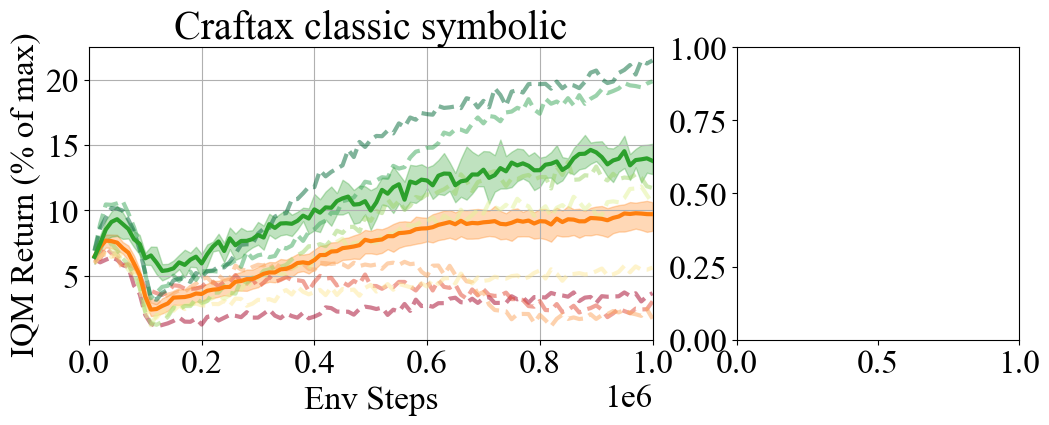

In [4]:
from experiments.craftax import COLORS, ORDERS

plt.rc("font", family="serif", serif="Times New Roman", size=24)
plt.rc("lines", linewidth=3)

fig, axes = plt.subplots(1, 2, figsize=(12, 3.8), gridspec_kw={"width_ratios": [0.4, 0.2]}) # 0.1
axes = axes.flatten()

all_single_algorithms = np.array(experiment_folders[1:])
colors = cm.RdYlGn(np.linspace(0, 1, len(all_single_algorithms)))

all_sum_values = [np.sum(experiment_data[experiment]["iqm"]) for experiment in all_single_algorithms]
ranking_algo = dict(
	[
		[experiment, ranking]
		for experiment, ranking in zip(
			all_single_algorithms[np.argsort(all_sum_values)], np.arange(len(all_single_algorithms))
		)
	]
)

for experiment, ranking in ranking_algo.items():
	axes[0].plot(
		experiment_data[experiment]["x_values"],
		experiment_data[experiment]["iqm"],
		color=colors[ranking],
		linestyle="dashed",
		zorder=ranking + 2,
		alpha=0.5,
	)

all_values = np.array([experiment_data[experiment]["iqm"] for experiment in all_single_algorithms])
all_confidence_low = np.array([experiment_data[experiment]["confidence"][0] for experiment in all_single_algorithms])
all_confidence_high = np.array([experiment_data[experiment]["confidence"][1] for experiment in all_single_algorithms])

random_search_values = all_values.mean(axis=0)
random_search_interval_low =all_confidence_low.mean(axis=0)
random_search_interval_high = all_confidence_high.mean(axis=0)

axes[0].plot(
	experiment_data[all_single_algorithms[0]]["x_values"],
	random_search_values,
	color=COLORS["Random search"],
	linestyle="solid",
	zorder=ORDERS["Random search"]
)
axes[0].fill_between(
	experiment_data[all_single_algorithms[0]]["x_values"],
	random_search_interval_low,
	random_search_interval_high,
	color=COLORS["Random search"],
	alpha=0.3,
)


axes[0].plot(
	experiment_data[experiment_folders[0]]["x_values"],
	experiment_data[experiment_folders[0]]["iqm"],
	color=COLORS["AdaDQN"],
	linestyle="solid",
	zorder=ORDERS["AdaDQN"]
)
axes[0].fill_between(
	experiment_data[experiment_folders[0]]["x_values"],
	experiment_data[experiment_folders[0]]["confidence"][0],
	experiment_data[experiment_folders[0]]["confidence"][1],
	color=COLORS["AdaDQN"],
	alpha=0.3,
)

axes[0].set_xlim((0, 1e6))
axes[0].set_xticks([idx * 1e5 for idx in range(0, 11, 2)])
axes[0].ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
axes[0].set_yticks([5, 10, 15, 20])
axes[0].grid()
axes[0].set_ylabel("IQM Return (% of max)")
axes[0].set_xlabel("Env Steps")
_ = axes[0].set_title("Craftax classic symbolic")

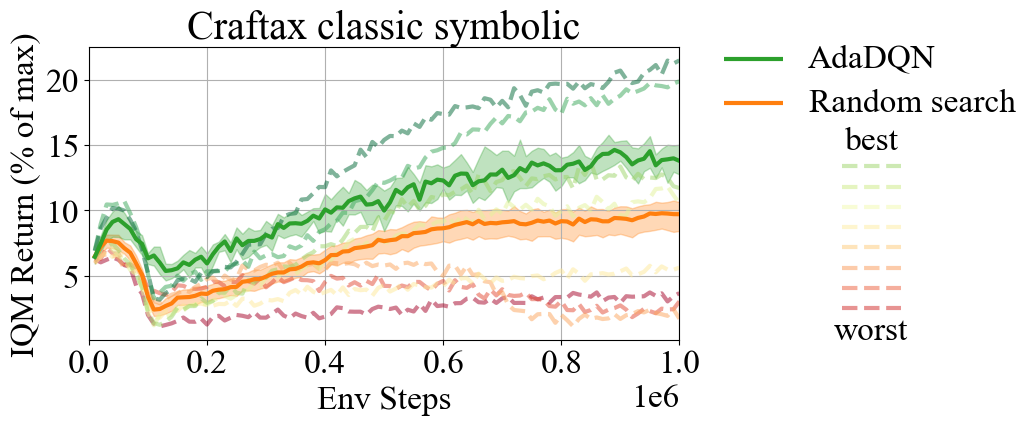

In [ ]:
from matplotlib.colors import ListedColormap

axes[1].clear()
# Add bar plot
cb1 = mpl.colorbar.ColorbarBase(axes[1], cmap=ListedColormap(np.ones((len(all_single_algorithms), 3))), boundaries=np.linspace(0.04, 1.04, len(all_single_algorithms)))
for bar_position in np.linspace(0, 0.8, len(all_single_algorithms) + 2)[1:-1]:
	cb1.ax.hlines((bar_position + 0.1) * 0.78, 0.4, 0.6, colors = cm.RdYlGn(bar_position), linestyles = "dashed", alpha=0.5)

cb1.ax.axis("off")
cb1.ax.text(0.5, 0.72, "best", verticalalignment="center", horizontalalignment="center")
cb1.ax.text(0.5, 0.07, "worst", verticalalignment="center", horizontalalignment="center")

axes[1].hlines(0.85, 0, 0.2, colors=COLORS["Random search"], linestyles="solid")
axes[1].text(0.64, 0.85, "Random search", verticalalignment="center", horizontalalignment="center")

axes[1].hlines(1, 0, 0.2, colors=COLORS["AdaDQN"], linestyles="solid")
axes[1].text(0.5, 1, "AdaDQN", verticalalignment="center", horizontalalignment="center")

fig.subplots_adjust(wspace=0.1)
fig.savefig(f"exp_output/performance.pdf", bbox_inches='tight')
fig

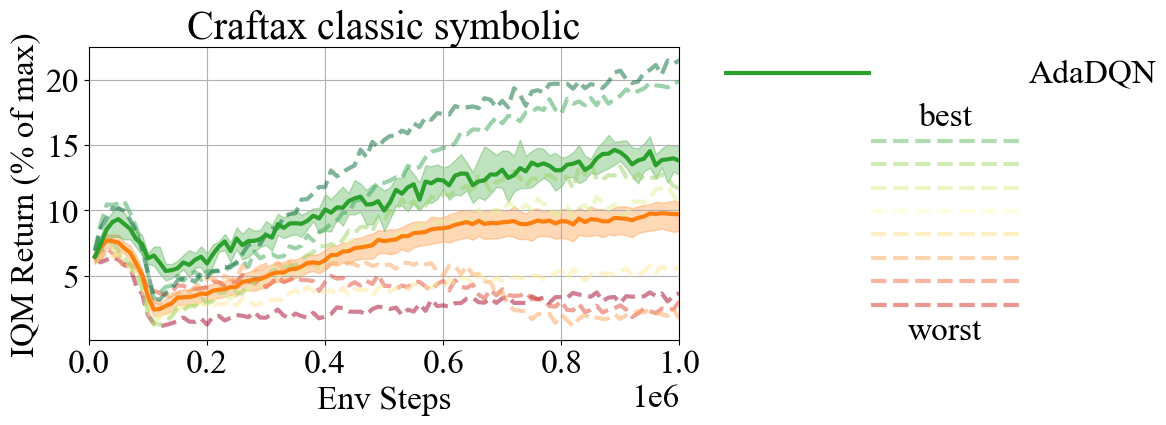

In [ ]:
from matplotlib.colors import ListedColormap

axes[1].clear()
# Add bar plot
cb1 = mpl.colorbar.ColorbarBase(axes[1], cmap=ListedColormap(np.ones((len(all_single_algorithms), 3))), boundaries=np.linspace(0.04, 1.04, len(all_single_algorithms)))
for bar_position in np.linspace(0, 0.9, len(all_single_algorithms) + 2)[1:-1]:
	cb1.ax.hlines((bar_position + 0.1) * 0.8, 0.5, 1, colors = cm.RdYlGn(bar_position), linestyles = "dashed", alpha=0.5)

cb1.ax.axis("off")
cb1.ax.text(0.75, 0.8, "best", verticalalignment="center", horizontalalignment="center")
cb1.ax.text(0.75, 0.07, "worst", verticalalignment="center", horizontalalignment="center")

axes[1].hlines(0.95, 0, 0.5, colors=COLORS["AdaDQN"], linestyles="solid")
axes[1].text(1.25, 0.95, "AdaDQN", verticalalignment="center", horizontalalignment="center")


fig.subplots_adjust(wspace=0.1)
fig.savefig(f"exp_output/performance.pdf", bbox_inches='tight')
fig

In [ ]:
# from experiments import COLORS


# plt.rc("font", family="serif", serif="Times New Roman", size=15)
# plt.rc("lines", linewidth=4)

# fig = plt.figure()
# ax = fig.add_subplot(111)

# colors = cm.RdYlGn(np.linspace(0, 1, len(all_single_algorithms)))

# all_sum_values = [np.nansum(experiment_data[experiment]["iqm"]) for experiment in all_single_algorithms]
# ranking_algo = dict(
# 	[
# 		[experiment, ranking]
# 		for experiment, ranking in zip(
# 			all_single_algorithms[np.argsort(all_sum_values)], np.arange(len(all_single_algorithms))
# 		)
# 	]
# )

# for experiment, ranking in ranking_algo.items():
# 	ax.plot(
# 		experiment_data[experiment]["x_values"],
# 		experiment_data[experiment]["iqm"],
# 		color=colors[ranking],
# 		linestyle="dashed",
# 		alpha=0.5,
# 		zorder=ranking + 2,
# 	)

# ax.plot(
# 	experiment_data[experiment_folders[0]]["x_values"],
# 	experiment_data[experiment_folders[0]]["iqm"],
# 	color=COLORS["adadqn"],
# 	linestyle="solid",
# 	zorder=len(all_single_algorithms) + 3,
# )
# ax.fill_between(
# 	experiment_data[experiment_folders[0]]["x_values"],
# 	experiment_data[experiment_folders[0]]["confidence"][0],
# 	experiment_data[experiment_folders[0]]["confidence"][1],
# 	color=COLORS["adadqn"],
# 	alpha=0.3,
# )

# ax.set_xlabel("Env Steps")
# ax.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
# ax.set_ylabel("IQM Return (% of max)", fontsize=15)

# ax.grid()
# # ax.legend()
# _ = ax.set_title("Craftax Classic Symbolic")